In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


Overview of the Dataset

In [106]:
data= pd.read_csv("/kaggle/input/data-banknote-authentication/data-banknote-authentication.csv")
print("data shape:",data.shape)
print(data.info())
data.head()

data shape: (1374, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Feature 1  1373 non-null   object
 1   Feature 2  1373 non-null   object
 2   Feature 3  1373 non-null   object
 3   Feature 4  1373 non-null   object
 4   Feature 5  1374 non-null   object
dtypes: object(5)
memory usage: 53.8+ KB
None


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,continuous,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,NaN,class
2,3.6216,8.6661,-2.8073,-0.44699,0
3,4.5459,8.1674,-2.4586,-1.4621,0
4,3.866,-2.6383,1.9242,0.10645,0


##### Rename columns


In [107]:
data.rename(columns={"Feature 1":"Variance_Wavelet",
                     "Feature 2":"Skewness_wavelet",
                     "Feature 3":"Curtosis_wavelet",
                     "Feature 4":"Image_entropy",
                     "Feature 5":"Class",
                    },inplace=True)
data.head(5)

,Variance_Wavelet,Skewness_wavelet,Curtosis_wavelet,Image_entropy,Class
0,continuous,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,NaN,class
2,3.6216,8.6661,-2.8073,-0.44699,0
3,4.5459,8.1674,-2.4586,-1.4621,0
4,3.866,-2.6383,1.9242,0.10645,0


##### Dropping rows by index position

In [108]:
data.drop(index=[0,1], inplace=True)
data.reset_index(inplace=True)
data.drop(["index"],axis="columns",inplace=True)
data.head()

,Variance_Wavelet,Skewness_wavelet,Curtosis_wavelet,Image_entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.4621,0
2,3.866,-2.6383,1.9242,0.10645,0
3,3.4566,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0


In [109]:
for column in data.columns:
    if data[column].dtype=="object":
        data[column]= data[column].astype("float64")

In [110]:
data["Class"]= data["Class"].astype("int64")
print("data shape:",data.shape)
print(data.info())
data.head()

data shape: (1372, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_wavelet  1372 non-null   float64
 2   Curtosis_wavelet  1372 non-null   float64
 3   Image_entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


,Variance_Wavelet,Skewness_wavelet,Curtosis_wavelet,Image_entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Exploratory Data Analysis
From the plot below, we can see that both classes {0 and 1} have nearly equal count hence the data is correctly balanced.

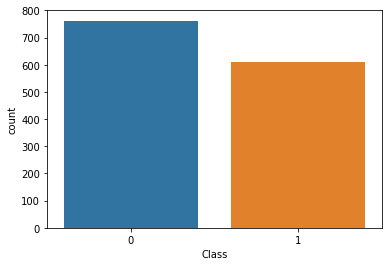

In [111]:
sns.countplot(data["Class"]);

##### Relationship among all feature pairs
Pairs of features having Image_entropy have the lowest separation while there are clear separations shown for pairs of features having Variance_Wavelet.

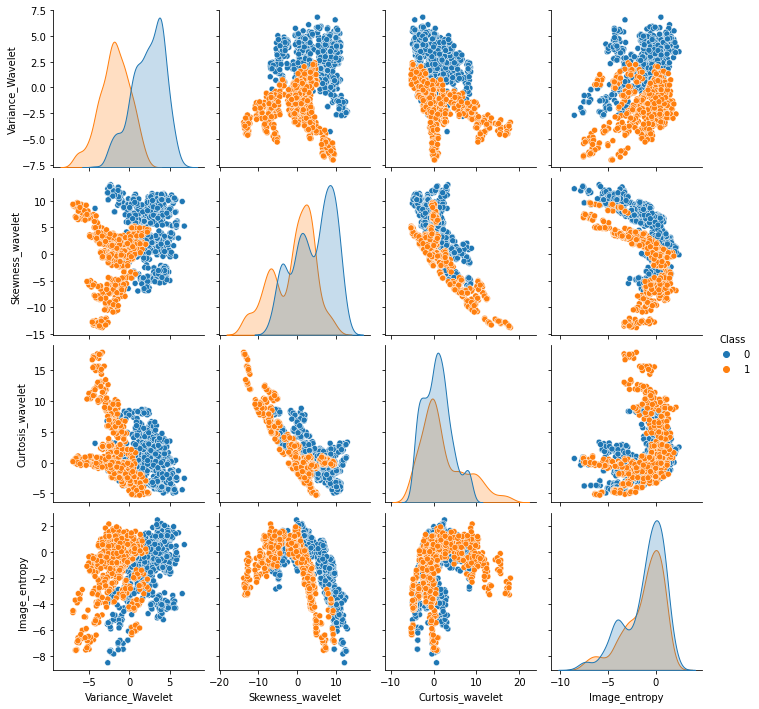

In [112]:
sns.pairplot(data, hue="Class");

##### Checking Multicollinearity
Multicollinearity refers to a situation whereby two or more independent variables are correlated.
There is high collinearity **(-0.79)** between Skewness_wavelet and Curtosis_wavelet, while the rest of the feature pairs have very minimal collinearity. 

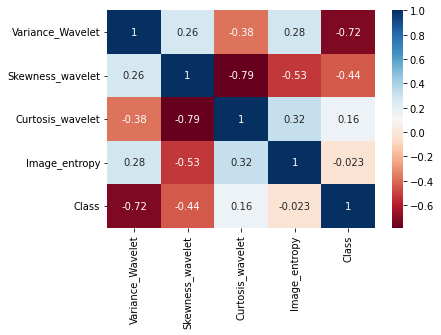

In [113]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show();

##### Distribution plots and Outliers
Extract and put the independent features into a list
1. From the disribution plots of each of the features, Image_entropy is negativel skewed while Curtosis_wavelet is skewed to the right. Variance_Wavelet has a distribution close to normal. The data is 
2. For the outliers plot, we can see that Curtosis_wavelet and Image_entropy have outliers hence we shall scale our data.

In [114]:
features=list(data[["Variance_Wavelet","Skewness_wavelet","Curtosis_wavelet","Image_entropy"]])
features


['Variance_Wavelet', 'Skewness_wavelet', 'Curtosis_wavelet', 'Image_entropy']

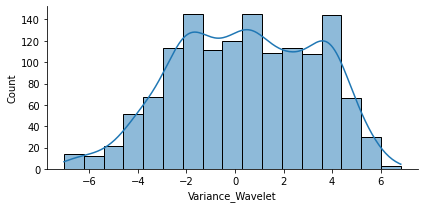

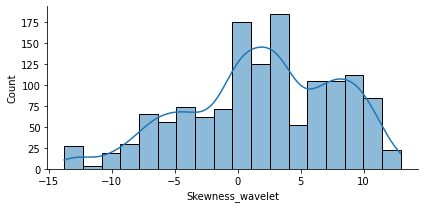

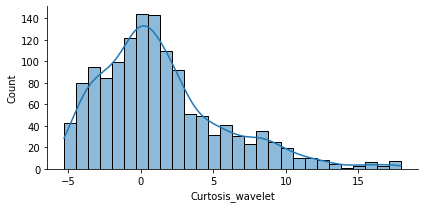

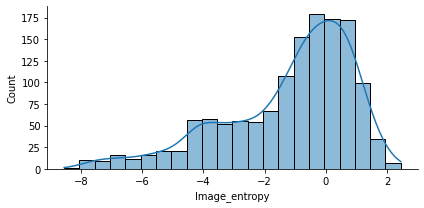

In [115]:
for i in features:
    sns.displot(data=data, x=i,kde=True, aspect=2, height=3)

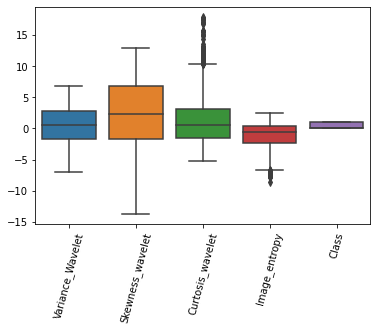

In [116]:
sns.boxplot(data=data)
plt.xticks(rotation=75)
plt.show();

##### Splitting the dataset

In [117]:
target="Class"
X= data.drop(columns=target)
y= data[target]
X.head()

,Variance_Wavelet,Skewness_wavelet,Curtosis_wavelet,Image_entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (1097, 4)
y_train shape: (1097,)


## SVM Model

Classification_Reports:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Accuracy of SVM model: 100.0


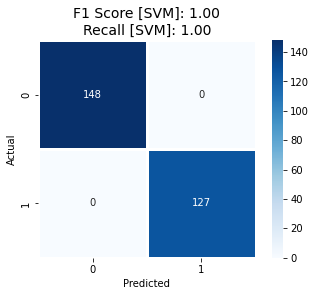

In [119]:
svm = SVC(kernel="rbf", C=100)

#Fitting the data
svm.fit(X_train, y_train)

# Predicting
y_pred= svm.predict(X_test)

# Results
print("Classification_Reports:")
print(classification_report(y_test,y_pred))

# Accuracy score
print("Accuracy of SVM model:", accuracy_score(y_test,y_pred)*100)

# F1 Score
f1_score_SVM = f1_score(y_test,y_pred, average="micro")

# Confusion matrix
cm_SVM = confusion_matrix(y_test,y_pred)

# Recall
recall_SVM = recall_score(y_test,y_pred)

# Heatmap Confusion matrix
sns.heatmap(cm_SVM, annot=True, fmt=".0f", linewidths=3, square=True,
           cmap="Blues", color="#cd1076")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Visualize F1 score and Recall
plt.title(f"F1 Score [SVM]: {f1_score_SVM:.2f}\n"
         f"Recall [SVM]: {recall_SVM:.2f}", size=14,color="black")
plt.show()
print("\n")

## Naive Bayes

Classification_Reports:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       148
           1       0.86      0.70      0.77       127

    accuracy                           0.81       275
   macro avg       0.82      0.80      0.80       275
weighted avg       0.81      0.81      0.80       275

Accuracy of Naive Bayes model: 80.72727272727272


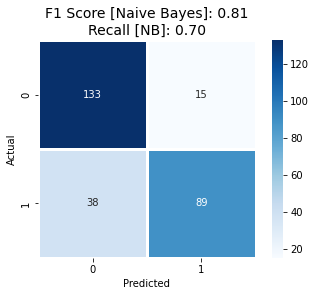

In [120]:
gnb= GaussianNB()

#Fitting the data
gnb.fit(X_train, y_train)

# Predicting
y_pred= gnb.predict(X_test)

# Results
print("Classification_Reports:")
print(classification_report(y_test,y_pred))

# Accuracy score
print("Accuracy of Naive Bayes model:", accuracy_score(y_test,y_pred)*100)

# F1 Score
f1_score_NB = f1_score(y_test,y_pred, average="micro")

# Confusion matrix
cm_NB = confusion_matrix(y_test,y_pred)

# Recall
recall_NB = recall_score(y_test,y_pred)

# Heatmap Confusion matrix
sns.heatmap(cm_NB, annot=True, fmt=".0f", linewidths=3, square=True,
           cmap="Blues", color="#cd1076")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Visualize F1 score and Recall
plt.title(f"F1 Score [Naive Bayes]: {f1_score_NB:.2f}\n"
         f"Recall [NB]: {recall_NB:.2f}", size=14,color="black")
plt.show()
print("\n")

### Comparison between Naive Bayes and SVC using F1 Score and Recall
Based on the two plots below, we can see that Support Vector Machine(SVM) is the preferred model compared to Naive Bayes.
This is because SVM has a higher F1 score and Recall score.


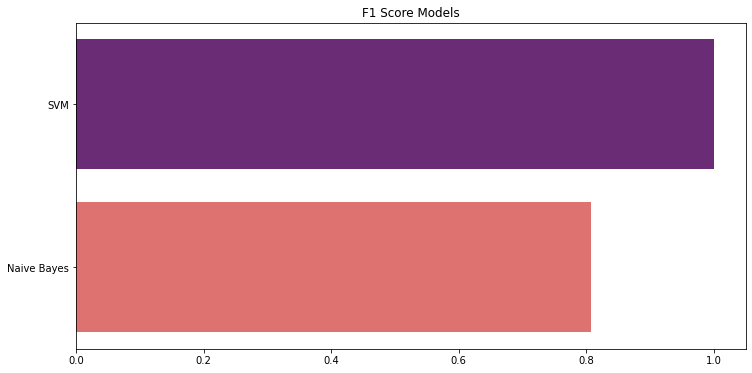

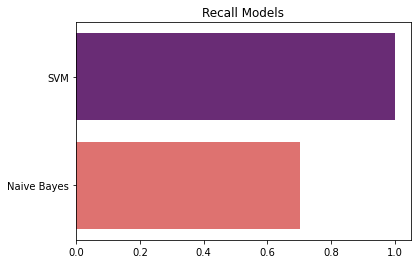

In [121]:
plt.figure(figsize=(12,6))
model_f1_score = [f1_score_SVM, f1_score_NB]
recalls = [recall_SVM, recall_NB]
model_name = ["SVM", "Naive Bayes"]
recall_name = ["SVM", "Naive Bayes"]

#f1 score barplot
sns.barplot(x= model_f1_score, y=model_name, palette="magma")
plt.title("F1 Score Models")
plt.show()

# Recall barplot
sns.barplot(x= recalls, y=recall_name, palette="magma")
plt.title("Recall Models")
plt.show()